<a href="https://colab.research.google.com/github/GR-TheArchitect/Colab_Public/blob/master/usa_banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np #python lib for numerical functions
import matplotlib #for plotting graphs
import matplotlib.pyplot as plt
from matplotlib import style #to use different styles while plotting
import pandas as pd #to use data frames

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import sklearn #python lib for linear regression and other models
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

In [0]:
import os

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/GR-TheArchitect/Colab_Public/master/"
CDS_PATH = os.path.join("datasets", "cdsinfo")
CDS_URL = DOWNLOAD_ROOT + "datasets/ist/"


In [0]:
def load_cds_data(cds_path=CDS_URL):
    csv_path = os.path.join(cds_path, "USA_Banking_Industry.csv")
    return pd.read_csv(csv_path)

In [7]:
cdsinfo = load_cds_data()
cdsinfo.head()

,Date,GS Expected Loss,GS Share Price,GS 6M-Implied Volatility,GS Market-Implied 1-Yr PD,GS Option-Implied DtD,WFC Expected Loss,WFC Share Price,WFC 6M-Implied Volatility,WFC Market-Implied 1-Yr PD,WFC Option-Implied DtD,VIX Index,SPX Level,Ln SPX Level,History Line
0,1/3/2007,0.040212,200.72,0.26798,0.016769,4.508364,0.000104,35.74,0.16209,0.000041,9.327541,0.1204,1416.60,7.256015,1
1,1/4/2007,0.042017,198.85,0.27095,0.017556,4.452859,0.000102,35.80,0.16206,0.000041,9.333197,0.1151,1418.34,7.257242,2
2,1/5/2007,0.041767,199.05,0.27052,0.017447,4.460590,0.000103,35.60,0.16180,0.000041,9.335066,0.1214,1409.71,7.251139,3
3,1/8/2007,0.039047,203.73,0.26671,0.016263,4.539759,0.000119,35.50,0.16347,0.000048,9.233190,0.1200,1412.84,7.253357,4
4,1/9/2007,0.039557,204.08,0.26790,0.016484,4.520741,0.000103,35.59,0.16173,0.000041,9.338449,0.1191,1412.11,7.252840,5


In [8]:
cdsinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3349 entries, 0 to 3348
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        3349 non-null   object 
 1   GS Expected Loss            3349 non-null   float64
 2   GS Share Price              3349 non-null   float64
 3   GS 6M-Implied Volatility    3349 non-null   float64
 4   GS Market-Implied 1-Yr PD   3349 non-null   float64
 5   GS Option-Implied DtD       3349 non-null   float64
 6   WFC Expected Loss           3349 non-null   float64
 7   WFC Share Price             3349 non-null   float64
 8   WFC 6M-Implied Volatility   3349 non-null   float64
 9   WFC Market-Implied 1-Yr PD  3349 non-null   float64
 10  WFC Option-Implied DtD      3349 non-null   float64
 11  VIX Index                   3349 non-null   float64
 12  SPX Level                   3349 non-null   float64
 13  Ln SPX Level                3349 

In [0]:
cdsinfo.hist(bins=50, figsize=(20,15))
plt.show()

In [0]:
cdsinfo.plot(kind="scatter", x="Ln SPX Level", y="GS Expected Loss")

No handles with labels found to put in legend.


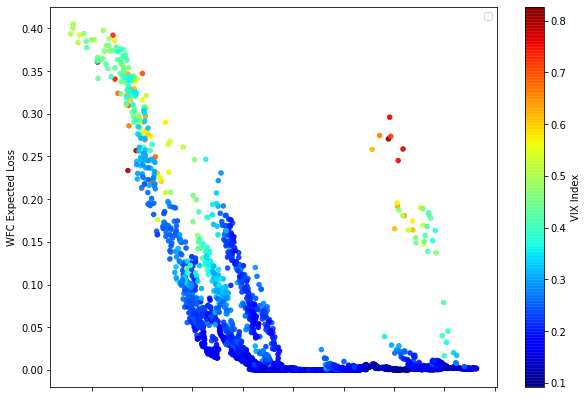

In [12]:
cdsinfo.plot(kind="scatter", x="Ln SPX Level", y="WFC Expected Loss", alpha=0.9,
             figsize=(10, 7), c="VIX Index", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

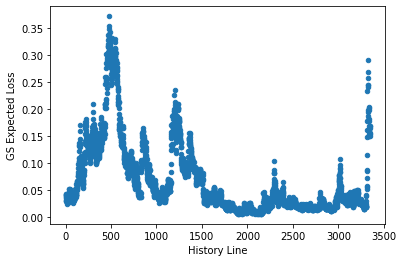

In [14]:
cdsinfo.plot(kind="scatter", x="History Line", y="GS Expected Loss")

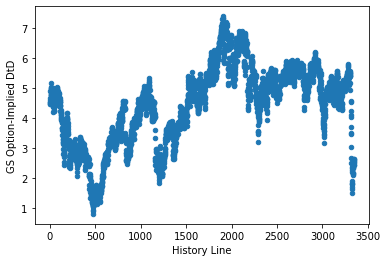

In [18]:
cdsinfo.plot(kind="scatter", x="History Line", y="GS Option-Implied DtD")

In [15]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


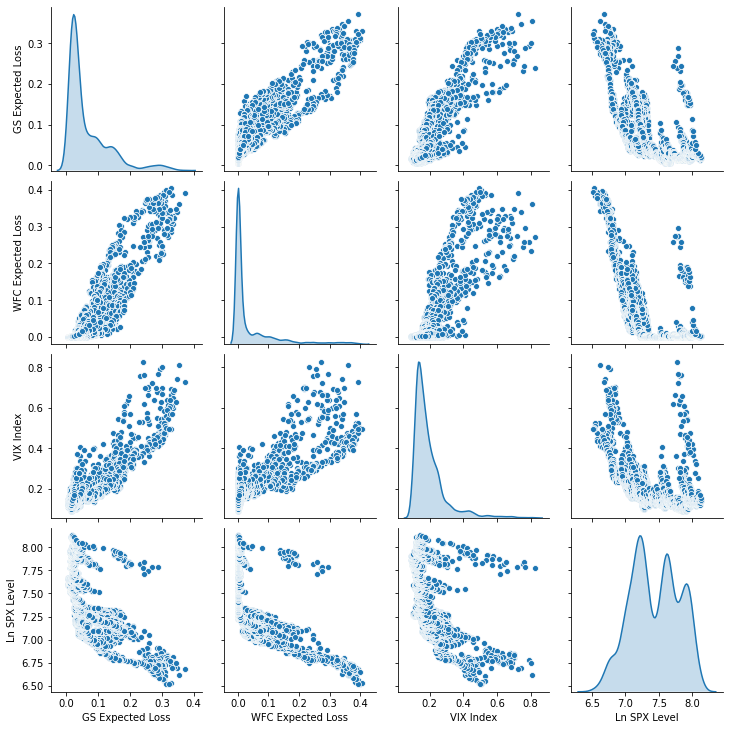

In [17]:
sns.pairplot(cdsinfo[["GS Expected Loss", "WFC Expected Loss", "VIX Index", "Ln SPX Level"]], diag_kind="kde")